In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Data processing

In [7]:
letter_folder = os.listdir('../dataset/Train/Train/')

In [11]:
X_train = []
y_train = []

path = '../dataset/Train/Train/'

for i in letter_folder:
    for j in os.listdir(f'{path}/{i}'):
        image = mpimg.imread(f'{path}/{i}/{j}')
        image = image.reshape(64, 64, 1)
        X_train.append(image)
        y_train.append(int(i))
X_train = np.array(X_train)


In [12]:
y_train = np.array(y_train)

In [13]:
X_train.shape

(70060, 64, 64, 1)

In [14]:
y_train = pd.get_dummies(y_train).astype(int).values

In [15]:
y_train.shape

(70060, 78)

In [16]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

## Model training

In [17]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))


model.add(Dense(78, activation='softmax'))

In [18]:
model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train_, y_train_, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.1788 - loss: 3.3377 - val_accuracy: 0.5420 - val_loss: 1.6127
Epoch 2/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.6022 - loss: 1.3962 - val_accuracy: 0.6434 - val_loss: 1.2335
Epoch 3/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7033 - loss: 1.0127 - val_accuracy: 0.7244 - val_loss: 0.9790
Epoch 4/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.7649 - loss: 0.7878 - val_accuracy: 0.7635 - val_loss: 0.8401
Epoch 5/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.8025 - loss: 0.6492 - val_accuracy: 0.7726 - val_loss: 0.8010
Epoch 6/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - accuracy: 0.8309 - loss: 0.5508 - val_accuracy: 0.7763 - val_loss: 0.7875
Epoch 7/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.8505 - loss: 0.4810 - val_accuracy: 0.8048 - val_loss: 0.7023
Epoch 8/10
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.8697 -

## Model saving

In [32]:
import pickle

In [27]:
from tensorflow.keras.models import load_model

In [42]:
with open('models/arm_pkl_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [43]:
model.save('models/arm_h5_model.h5')

In [20]:
letters_dict = {
    0: 'Ա', 1: 'Բ', 2: 'Գ', 3: 'Դ', 4: 'Ե', 5: 'Զ', 6: 'Է', 7: 'Ը', 8: 'Թ', 9: 'Ժ',
    10: 'Ի', 11: 'Լ', 12: 'Խ', 13: 'Ծ', 14: 'Կ', 15: 'Հ', 16: 'Ձ', 17: 'Ղ', 18: 'Ճ', 19: 'Մ',
    20: 'Յ', 21: 'Ն', 22: 'Շ', 23: 'Ո', 24: 'Ու', 25: 'Չ', 26: 'Պ', 27: 'Ջ', 28: 'Ռ', 29: 'Ս',
    30: 'Վ', 31: 'Տ', 32: 'Ր', 33: 'Ց', 34: 'Փ', 35: 'Ք', 36: 'Եվ', 37: 'Օ', 38: 'Ֆ',
    39: 'ա', 40: 'բ', 41: 'գ', 42: 'դ', 43: 'ե', 44: 'զ', 45: 'է', 46: 'ը', 47: 'թ', 48: 'ժ',
    49: 'ի', 50: 'լ', 51: 'խ', 52: 'ծ', 53: 'կ', 54: 'հ', 55: 'ձ', 56: 'ղ', 57: 'ճ', 58: 'մ',
    59: 'յ', 60: 'ն', 61: 'շ', 62: 'ո', 63: 'ու', 64: 'չ', 65: 'պ', 66: 'ջ', 67: 'ռ', 68: 'ս',
    69: 'վ', 70: 'տ', 71: 'ր', 72: 'ց', 73: 'փ', 74: 'ք', 75: 'և', 76: 'օ', 77: 'ֆ'
}

## Model prediction

In [34]:
new_test_image = mpimg.imread('test_images/uppercase_a.jpg')

new_test_image_gray = cv2.cvtColor(new_test_image, cv2.COLOR_RGB2GRAY)

new_test_image_resized = cv2.resize(new_test_image_gray, (64, 64))

new_test_image_inverted = cv2.bitwise_not(new_test_image_resized)

image = new_test_image_inverted.reshape(1, 64, 64, 1)

print(new_test_image_resized.shape)

prediction = np.argmax(arm_char_model.predict(image))

(64, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [35]:
print(prediction, letters_dict[prediction])

0 Ա


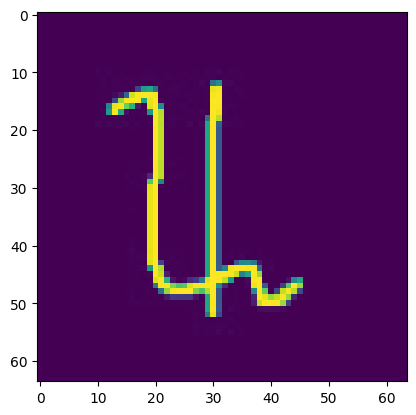

In [36]:
plt.imshow(new_test_image_inverted.reshape(64, 64, 1))

In [37]:
new_test_image = mpimg.imread('test_images/lowercase_a.jpg')

new_test_image_gray = cv2.cvtColor(new_test_image, cv2.COLOR_RGB2GRAY)

new_test_image_resized = cv2.resize(new_test_image_gray, (64, 64))

new_test_image_inverted = cv2.bitwise_not(new_test_image_resized)

image = new_test_image_inverted.reshape(1, 64, 64, 1)

print(new_test_image_resized.shape)

prediction = np.argmax(arm_char_model.predict(image))

(64, 64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [38]:
print(prediction, letters_dict[prediction])

39 ա


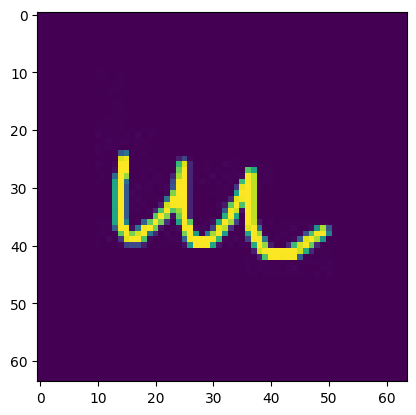

In [39]:
plt.imshow(new_test_image_inverted.reshape(64, 64, 1))

## Model loading

In [44]:
with open('models/arm_pkl_model.pkl', 'rb') as file:
    arm_pkl_model = pickle.load(file)

In [45]:
arm_h5_model = load_model('models/arm_h5_model.h5')

In [56]:
!pip freeze > requirements.txt